In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [2]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [3]:
X.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
X.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [5]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [6]:
print(y.head())
print("n: ",y.size)

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64
n:  20640


### Creando el Hold-out test

In [94]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .8, shuffle = True, random_state=42)

### Estandarizar atributos

In [8]:
# Media y ds
mu_train = np.mean(X_train, axis=0)   # vector de medias por cada columna
ds_train = np.std(X_train, axis=0) # vector ds por cada columna

# Estandarizando
X_train_std = (X_train - mu_train) / ds_train
X_test_std  = (X_test  - mu_train) / ds_train # X_test estandarizado con los datos del X_train

In [9]:
X_train_std.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,-0.326196,0.348490,-0.174916,-0.208365,0.768276,0.051376,-1.372811,1.272587
8267,-0.035843,1.618118,-0.402835,-0.128530,-0.098901,-0.117362,-0.876696,0.709162
17445,0.144701,-1.952710,0.088216,-0.257538,-0.449818,-0.032280,-0.460146,-0.447603
14265,-1.017864,0.586545,-0.600015,-0.145156,-0.007434,0.077507,-1.382172,1.232698
2271,-0.171488,1.142008,0.349007,0.086624,-0.485877,-0.068832,0.532084,-0.108551


Agregando interceptos

In [10]:
X_train_std["Intercepto"] = 1
X_test_std["Intercepto"] = 1

In [11]:
X_train_std.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Intercepto
14196,-0.326196,0.348490,-0.174916,-0.208365,0.768276,0.051376,-1.372811,1.272587,1
8267,-0.035843,1.618118,-0.402835,-0.128530,-0.098901,-0.117362,-0.876696,0.709162,1
17445,0.144701,-1.952710,0.088216,-0.257538,-0.449818,-0.032280,-0.460146,-0.447603,1
14265,-1.017864,0.586545,-0.600015,-0.145156,-0.007434,0.077507,-1.382172,1.232698,1
2271,-0.171488,1.142008,0.349007,0.086624,-0.485877,-0.068832,0.532084,-0.108551,1


#### 2. Closed-form OLS
- Derive and implement $ \hat{\beta} = (X^\top X)^{-1} X^\top y.$ using only `numpy`

In [12]:
beta_best = np.linalg.inv(X_train_std.T.dot(X_train_std)).dot(X_train_std.T).dot(y_train)
beta_best_df = pd.DataFrame(data=beta_best[np.newaxis, :], columns=X_train_std.columns)##solo para visualizar como DF
beta_best_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Intercepto
0,0.854383,0.122546,-0.29441,0.339259,-0.002308,-0.040829,-0.896929,-0.869842,2.071947


- Plot predicted vs. true median house value on a held-out test set.

In [13]:
print(beta_best.shape)
print(X_test_std.shape)

(9,)
(4128, 9)


In [14]:
y_pred = X_test_std.dot(beta_best) 

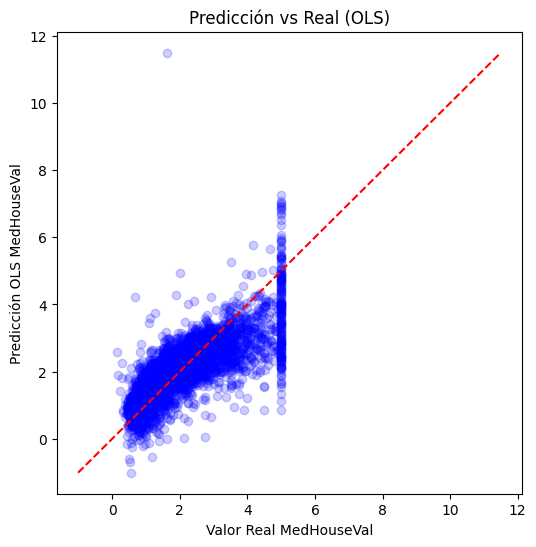

In [15]:
import matplotlib.pyplot as plt


plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.2)
plt.xlabel("Valor Real MedHouseVal")
plt.ylabel("Predicción OLS MedHouseVal")
plt.title("Predicción vs Real (OLS)")

# línea identidad
lims = [min(y_test.min(), y_pred.min()),
        max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, 'r--')  
plt.show()

### 3. Implement Gradient Descent

- Implement gradient descent to minimize mean squared error.

In [16]:
def f(X, theta):
    """The linear model we are trying to fit.

    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional data matrix

    Returns:
    y_pred (np.array): n-dimensional vector of predicted targets
    """
    return X.dot(theta)

In [17]:
def mean_squared_error(theta, X, y):
    """The cost function, J, describing the goodness of fit.

    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional design matrix
    y (np.array): n-dimensional vector of targets
    """
    return 0.5*np.mean((y-f(X,theta))**2)

In [18]:
def mse_gradient(theta, X, y):
    """The gradient of the cost function.

    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional design matrix
    y (np.array): n-dimensional vector of targets

    Returns:
    grad (np.array): d-dimensional gradient of the MSE
    """
    return np.mean((f(X, theta) - y) * X.T, axis=1)

In [19]:
class gradient_descent():
    def __init__(self ,step_size, X_train, y_train ,threshold = 1e-3):
        
        self.step_size = step_size
        self.X_train = X_train
        self.y_train = y_train
        self.threshold = threshold
        self.theta = np.zeros(X_train.shape[1])
        self.theta_prev = np.ones(X_train.shape[1])
        self.iter = 0
        self.costo = []
        self.coeficientes = None

    def fit(self):
        while np.linalg.norm(self.theta - self.theta_prev) > self.threshold:
            mse = mean_squared_error(self.theta, self.X_train, self.y_train)
            self.costo.append(mse)

            if self.iter % 100 == 0:
                print('Iteracion %d. MSE: %.6f' % (self.iter, mse))
            self.theta_prev = self.theta.copy()
            gradient = mse_gradient(self.theta, self.X_train, self.y_train)
            self.theta = self.theta_prev - self.step_size * gradient
            self.iter += 1
        self.coeficientes = self.theta.copy()

        print("\nCoeficientes:")
        print(self.coeficientes)
        print("\nNro. Iteraciones: %d" % (self.iter))

- Experiment with at least two learning rates; show cost vs. iteration curves.

In [ ]:
### StepSize 0.1
step_size_1 = 1e-1
gd_1=gradient_descent(step_size_1,X_train_std,y_train)
gd_1.fit()

Iteracion 0. MSE: 2.814871
Iteracion 100. MSE: 0.273758
Iteracion 200. MSE: 0.262270
Iteracion 300. MSE: 0.259786

Coeficientes:
MedInc        0.865376
HouseAge      0.135780
AveRooms     -0.294328
AveBedrms     0.329256
Population    0.002148
AveOccup     -0.042320
Latitude     -0.787235
Longitude    -0.760449
Intercepto    2.071947
dtype: float64

Nro. Iteraciones: 307


In [ ]:
### StepSize 0.01
step_size_2 = 1e-2
gd_2=gradient_descent(step_size_2,X_train_std,y_train)
gd_2.fit()

Iteracion 0. MSE: 2.814871
Iteracion 100. MSE: 0.651980
Iteracion 200. MSE: 0.356085
Iteracion 300. MSE: 0.309558

Coeficientes:
MedInc        0.765207
HouseAge      0.190838
AveRooms      0.015340
AveBedrms    -0.006265
Population    0.013988
AveOccup     -0.041977
Latitude     -0.264163
Longitude    -0.218479
Intercepto    2.018002
dtype: float64

Nro. Iteraciones: 363


In [ ]:
### StepSize 0.001
step_size_3 = 1e-3
gd_3=gradient_descent(step_size_3,X_train_std,y_train)
gd_3.fit()

Iteracion 0. MSE: 2.814871
Iteracion 100. MSE: 2.360729
Iteracion 200. MSE: 1.989653
Iteracion 300. MSE: 1.686300
Iteracion 400. MSE: 1.438195
Iteracion 500. MSE: 1.235185
Iteracion 600. MSE: 1.069002
Iteracion 700. MSE: 0.932903
Iteracion 800. MSE: 0.821391

Coeficientes:
MedInc        0.432272
HouseAge      0.085372
AveRooms      0.069131
AveBedrms    -0.039745
Population   -0.009514
AveOccup     -0.017355
Latitude     -0.097328
Longitude    -0.053409
Intercepto    1.145978
dtype: float64

Nro. Iteraciones: 805


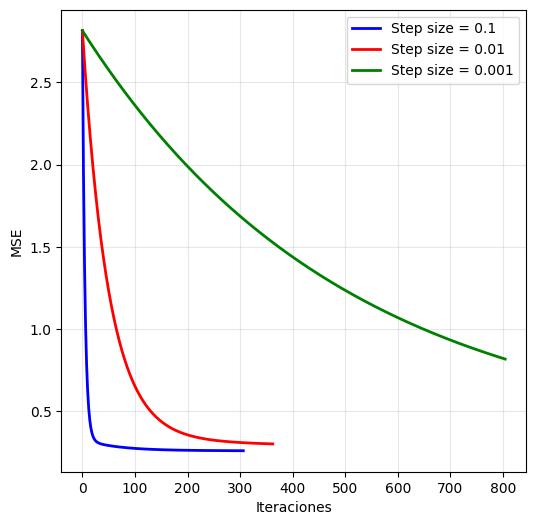

In [23]:
plt.figure(figsize=(6, 6))
plt.plot(range(len(gd_1.costo)), gd_1.costo, 'b-', label=f'Step size = {gd_1.step_size}', linewidth=2)
plt.plot(range(len(gd_2.costo)), gd_2.costo, 'r-', label=f'Step size = {gd_2.step_size}', linewidth=2)
plt.plot(range(len(gd_3.costo)), gd_3.costo, 'g-', label=f'Step size = {gd_3.step_size}', linewidth=2)

plt.xlabel('Iteraciones')
plt.ylabel('MSE')
plt.legend()
plt.grid(True, alpha=0.3)

- Compare parameters and test error to the closed-form OLS.

In [24]:
param_OLS = beta_best_df
param_GD = pd.DataFrame(data=gd_1.coeficientes)

In [25]:
param_GD.T

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Intercepto
0,0.865376,0.13578,-0.294328,0.329256,0.002148,-0.04232,-0.787235,-0.760449,2.071947


In [26]:
param_OLS

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Intercepto
0,0.854383,0.122546,-0.29441,0.339259,-0.002308,-0.040829,-0.896929,-0.869842,2.071947


In [27]:
mse_ols = np.mean((y_test - y_pred) ** 2)

y_pred_gd = X_test_std.dot(gd_1.coeficientes)
mse_gd = np.mean((y_test - y_pred_gd) ** 2)

print("MSE OLS - forma cerrada:",mse_ols)
print("MSE GD:",mse_gd)

MSE OLS - forma cerrada: 0.5558915986952438
MSE GD: 0.5549457340435588


### Part B. Scikit-learn Linear Models
#### 4. Baseline

- Use LinearRegression and confirm the coefficients match your OLS implementation.

In [28]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train_std, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [29]:
print("Parametros OLS")
param_OLS

Parametros OLS


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Intercepto
0,0.854383,0.122546,-0.29441,0.339259,-0.002308,-0.040829,-0.896929,-0.869842,2.071947


In [30]:
print("Parametros LinearModel")
pd.DataFrame(data=linear_model.coef_).T

Parametros LinearModel


,0,1,2,3,4,5,6,7,8
0,0.854383,0.122546,-0.29441,0.339259,-0.002308,-0.040829,-0.896929,-0.869842,0.0


- Compute R2 and mean squared error on the test set.

In [31]:
test_mse = ((y_test - linear_model.predict(X_test_std)) ** 2).mean()
test_R2 = 1 - test_mse / ((y_test - y_test.mean()) ** 2).mean()

In [32]:
print(f"MSE de Scikit LinearModel : {test_mse: .4f}")
print(f"R2 of basic model: {test_R2: .4f}")

MSE de Scikit LinearModel :  0.5559
R2 of basic model:  0.5758


### Part C. Regularization and Hyperparameter Choice

#### Ridge and Lasso

- Fit Ridge and Lasso regressions for $\lambda$ values logarithmically spaced between $10^{-3}$ and $10^2$

In [33]:
from sklearn.linear_model import Ridge, Lasso, lars_path
from matplotlib import pyplot as plt

# creando ridge coeficientes
alphas_ridge = np.logspace(-3, 2, )
ridge_coefs = []
for a in alphas_ridge:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train_std, y_train)
    ridge_coefs.append(ridge.coef_)


# creando lasso coeficientes
feature_names = X_train_std.columns.tolist()
alphas_lasso = np.logspace(-3, 2, )
lasso_coefs = []
for a in alphas_lasso:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train_std, y_train)
    lasso_coefs.append(lasso.coef_)


- Plot coefficient magnitude vs. λ (regularization paths).

(np.float64(0.0005623413251903491),
 np.float64(177.82794100389228),
 np.float64(-1.0453718609082099),
 np.float64(2.220390558221691))

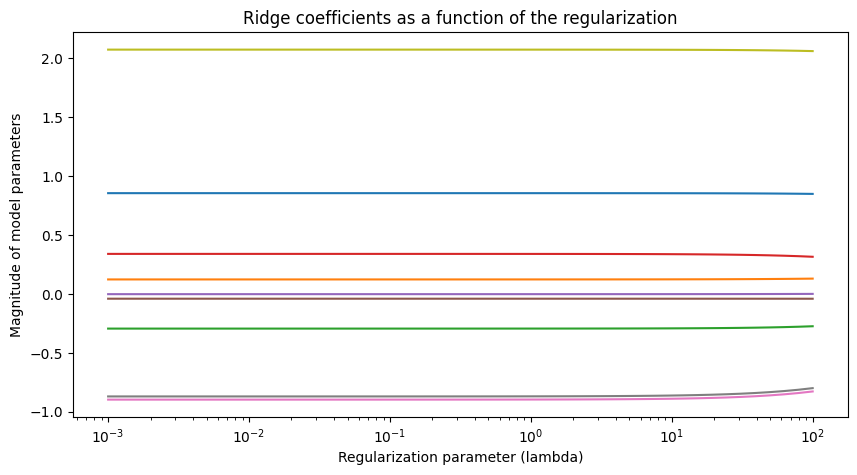

In [34]:
# plot ridge coefficients
plt.figure(figsize=(10, 5))
plt.plot(alphas_ridge, ridge_coefs)
plt.xscale('log')
plt.xlabel('Regularization parameter (lambda)')
plt.ylabel('Magnitude of model parameters')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

(np.float64(0.0005623413251903491),
 np.float64(177.82794100389228),
 np.float64(-0.9725702970451395),
 np.float64(0.9358885086323672))

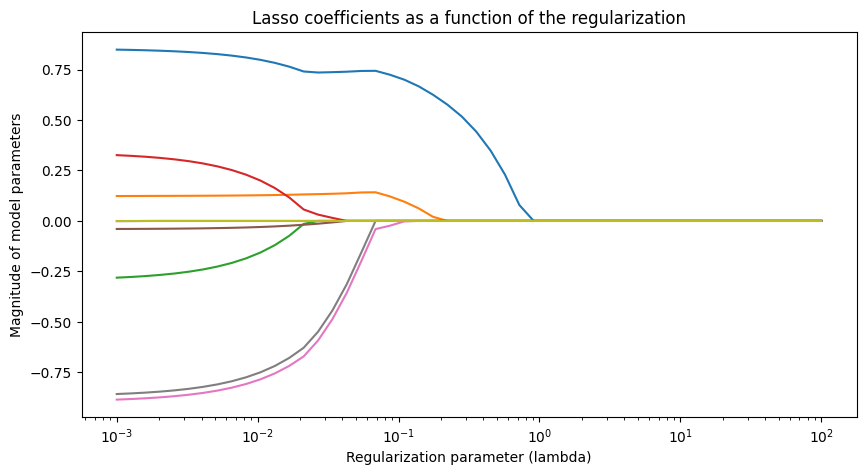

In [35]:
# plot ridge coefficients
plt.figure(figsize=(10, 5))
plt.plot(alphas_lasso, lasso_coefs)
plt.xscale('log')
plt.xlabel('Regularization parameter (lambda)')
plt.ylabel('Magnitude of model parameters')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')


- Comment on which features shrink to (or toward) zero and why.

Las caracteristicas que se vuelven 0 rapidamente para el caso de Lasso son Population, AveRooms, AveOccup, AveBedrooms.

Debido a que su relación con la prediccion no es relevante por lo que no aporta significativamente.

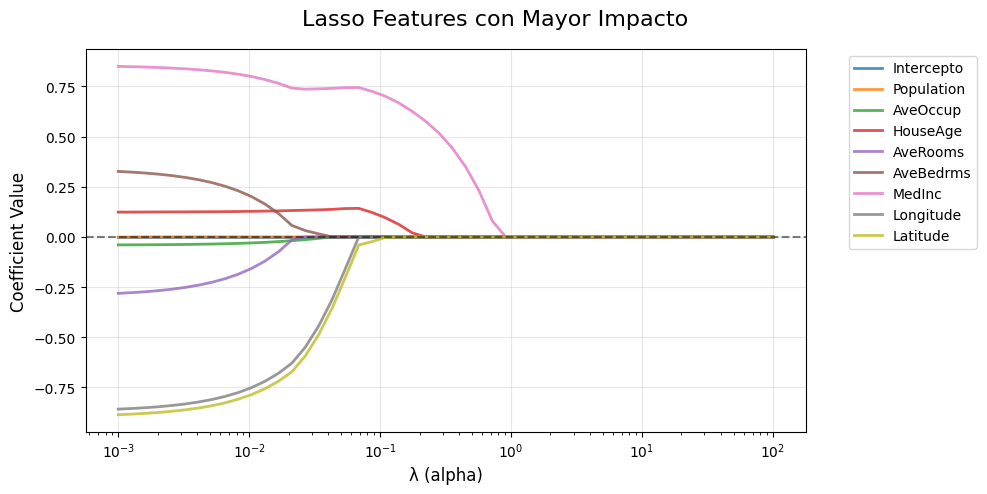

In [36]:
lasso_coefs = np.array(lasso_coefs)

plt.figure(figsize=(10, 5))
plt.suptitle('Lasso Features con Mayor Impacto', fontsize=16)

initial_coefs = np.abs(lasso_coefs[0])  # lambda más pequeño
important_indices = np.argsort(initial_coefs)

for i in important_indices:
    plt.semilogx(alphas_lasso, lasso_coefs[:, i], 
                linewidth=2, alpha=0.8, label=feature_names[i])

plt.xlabel('λ (alpha)', fontsize=12)
plt.ylabel('Coefficient Value', fontsize=12)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### 6. k-Fold Cross-Validation

- Use `KFold` with `5 folds` and `cross_val_score` to select the best $\alpha$ for both Ridge and Lasso.

In [37]:
# import warnings
# from sklearn.model_selection import KFold
# upper_bound = 1
# niter = 1000
# alpha = np.arange(0,upper_bound,upper_bound/niter)
# kf = KFold(n_splits=5)

# avg_mspe = []

# for i in alpha:

#     fold_pe = []

#     X_std = X_train_std.values  # Convertir a numpy array
#     y_vals = y_train.values if hasattr(y_train, 'values') else y_train

#     for train_index, test_index in kf.split(X_std):

#         X_train_fold, X_test_fold = X_std[train_index], X_std[test_index]
#         y_train_fold, y_test_fold = y_vals[train_index], y_vals[test_index]

#         with warnings.catch_warnings():
#             warnings.simplefilter("ignore")
#             model = Lasso(alpha=i).fit(X_train_fold,y_train_fold)

#         predict = model.predict(X_test_fold)

#         pe = np.sum((y_test_fold-predict)**2)

#         fold_pe.append(pe)

#     avg_mspe.append(np.mean(np.array(fold_pe)))

# chosen_alpha = alpha[np.argmin(avg_mspe)]

In [38]:
#chosen_alpha

In [39]:
from sklearn.model_selection import KFold, cross_val_score
# configuración
kf = KFold(n_splits=5, shuffle=True, random_state=42)
niter = 1000
alpha = np.logspace(-3, 2, 100)

# --- Ridge ---
ridge_avg_mspe = []
for i in alpha:
    ridge = Ridge(alpha=i)
    # cross_val_score devuelve por defecto R²; pedimos MSE negativo
    scores = cross_val_score(ridge, X_train_std, y_train, cv=kf, scoring='neg_mean_squared_error')
    ridge_avg_mspe.append(-scores.mean())  # promedio de los 5 folds

best_alpha_ridge = alpha[np.argmin(ridge_avg_mspe)]
print("Mejor α para Ridge:", best_alpha_ridge)

# --- Lasso ---
lasso_avg_mspe = []
for i in alpha:
    lasso = Lasso(alpha=i, max_iter=5000)
    scores = cross_val_score(lasso, X_train_std, y_train, cv=kf, scoring='neg_mean_squared_error')
    lasso_avg_mspe.append(-scores.mean())

best_alpha_lasso = alpha[np.argmin(lasso_avg_mspe)]
print("Mejor α para Lasso:", best_alpha_lasso)

Mejor α para Ridge: 3.4304692863149193
Mejor α para Lasso: 0.001


- Alternatively, demonstrate the convenience of RidgeCV and LassoCV.

In [40]:
from sklearn.linear_model import RidgeCV, LassoCV

ridgecv = RidgeCV(alphas=alpha, cv=kf, scoring='neg_mean_squared_error')
lassocv = LassoCV(alphas=alpha, cv=kf, max_iter=5000)

ridgecv.fit(X_train_std, y_train)
lassocv.fit(X_train_std, y_train)

print("RidgeCV mejor α:", ridgecv.alpha_)
print("LassoCV mejor α:", lassocv.alpha_)


RidgeCV mejor α: 3.4304692863149193
LassoCV mejor α: 0.001


- Compare cross-validated test errors.

In [41]:
print("Mejor α Ridge:", best_alpha_ridge,
      "\n\tMSE validación cruzada:", min(ridge_avg_mspe))

print("Mejor α Lasso:", best_alpha_lasso,
      "\n\tMSE validación cruzada:", min(lasso_avg_mspe))

Mejor α Ridge: 3.4304692863149193 
	MSE validación cruzada: 0.5193251418584345
Mejor α Lasso: 0.001 
	MSE validación cruzada: 0.5192951173727799


In [ ]:
#MSE:
ridge_mse = ((y_test - ridgecv.predict(X_test_std)) ** 2).mean()
lasso_mse = ((y_test - lassocv.predict(X_test_std)) ** 2).mean()

print("Ridge MSE:", ridge_mse)
print("Lasso MSE:", lasso_mse)

### 7. Feature Engineering & Multicollinearity
- Add polynomial features (degree 2) using PolynomialFeatures.

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# pipeline sin regularización
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("pf", polynomial_features), ("lr", linear_regression)])
pipeline.fit(X_train_std, y_train)

# pipeline Ridge
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
ridge = Ridge(alpha=best_alpha_ridge) 
pipeline_ridge = Pipeline([("pf", polynomial_features), ("rd", ridge)])
pipeline_ridge.fit(X_train_std, y_train)

# pipeline Lasso
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
lasso = Lasso(alpha=best_alpha_lasso, max_iter=5000) 
pipeline_lasso = Pipeline([("pf", polynomial_features), ("ls", lasso)])
pipeline_lasso.fit(X_train_std, y_train)

C:\Users\Resch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.654e+03, tolerance: 2.207e+00
  model = cd_fast.enet_coordinate_descent(


,steps,"[('pf', ...), ('ls', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,2
,interaction_only,False
,include_bias,False
,order,'C'
,alpha,np.float64(0.001)
,fit_intercept,True
,precompute,False


In [44]:
from sklearn.model_selection import cross_val_score
import numpy as np

for name, model in [("OLS", pipeline),
                    ("Ridge", pipeline_ridge),
                    ("Lasso", pipeline_lasso)]:
    scores = cross_val_score(model, X_train_std, y_train,
                             cv=5, scoring='neg_mean_squared_error')
    print(f"{name} CV MSE: {-scores.mean():.4f}")


OLS CV MSE: 10.4483
Ridge CV MSE: 4.1245


C:\Users\Resch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.863e+03, tolerance: 1.755e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Resch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.797e+03, tolerance: 1.779e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Resch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loca

Lasso CV MSE: 0.7002


C:\Users\Resch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.621e+03, tolerance: 1.757e+00
  model = cd_fast.enet_coordinate_descent(


### Part D. Bike Rentals

#### 8. Alternative Dataset

- Use the Bike Sharing Dataset (available in the data folder).

In [ ]:
bike_sharing_db = pd.read_csv("../data/hour.csv")

In [64]:
bike_sharing_db.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [119]:
import pandas as pd

# Asegúrate de que dteday es datetime
bike_sharing_db['dteday'] = pd.to_datetime(bike_sharing_db['dteday'])

bike_sharing_daily = (
    bike_sharing_db.groupby('dteday')
    .agg({
        'season': 'first',        # es constante en el día
        'yr': 'first',
        'mnth': 'first',
        'holiday': 'max',         # 0 o 1, toma 1 si hubo algún festivo en el día
        'weekday': 'first',       # primer registro del día
        'workingday': 'max',      # 1 si se trabajó ese día
        'weathersit': 'mean',     # promedio del día
        'temp': 'mean',
        'atemp': 'mean',
        'hum': 'mean',
        'windspeed': 'mean',
        'casual': 'sum',          
        'registered': 'sum',
        'cnt': 'sum'              #total del día
    })
    .reset_index()
)

bike_sharing_daily.head(10)


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,1.583333,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,1.956522,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1.000000,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1.043478,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1.000000,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,2011-01-06,1,0,1,0,4,1,1.347826,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,2011-01-07,1,0,1,0,5,1,1.695652,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,2011-01-08,1,0,1,0,6,0,1.708333,0.165000,0.162254,0.535833,0.266804,68,891,959
8,2011-01-09,1,0,1,0,0,0,1.000000,0.138333,0.116175,0.434167,0.361950,54,768,822
9,2011-01-10,1,0,1,0,1,1,1.333333,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [144]:
X_bike = bike_sharing_daily.drop(columns=["dteday", "cnt", "casual", "registered", "temp"])
y_bike = bike_sharing_daily['cnt']

- Predict daily rentals `(cnt)`; investigate seasonal effects.

In [ ]:
import seaborn as sns
season_map = {1: "Winter", 2: "Spring", 3: "Summer", 4: "Fall"}
bike_sharing_db["season_name"] = bike_sharing_db["season"].map(season_map)

# --- Plot 1: ---
plt.figure(figsize=(8,5))
sns.barplot(x="season_name", y="cnt", data=bike_sharing_db, ci=None, palette="viridis")
plt.title("Promedio renta de bicicletas por estacion")
plt.ylabel("promedio rentas")
plt.xlabel("Season")
plt.show()

# --- Plot 2:--
plt.figure(figsize=(12,6))
sns.lineplot(x="hr", y="cnt", hue="season_name", data=bike_sharing_db, ci=None)
plt.title("Renta de bicicletas por hora en cada Estacion")
plt.ylabel("Rentas")
plt.xlabel("Hora del día")
plt.legend(title="Season")
plt.show()

- Create a Hold-out test

In [145]:
X_bk_train, X_bk_test, y_bk_train, y_bk_test = train_test_split(X_bike, y_bike, train_size = .8, shuffle = True, random_state=42)

In [146]:
X_bk_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed
682,4,1,11,0,2,1,1.791667,0.323225,0.662917,0.342046
250,3,0,9,0,4,1,2.652174,0.555361,0.939565,0.192748
336,4,0,12,0,6,0,1.083333,0.310604,0.612917,0.095783
260,3,0,9,0,0,0,1.375000,0.490538,0.695000,0.178483
543,3,1,6,0,3,1,1.000000,0.640792,0.360000,0.271775


- Standardize features to zero mean and unit variance.

In [147]:
# Media y ds
mu_bk_train = np.mean(X_bk_train, axis=0)   # vector de medias por cada columna
ds_bk_train = np.std(X_bk_train, axis=0) # vector ds por cada columna

# Estandarizando
X_bk_train_std = (X_bk_train - mu_bk_train) / ds_bk_train
X_bk_test_std  = (X_bk_test  - mu_bk_train) / ds_bk_train # X_test estandarizado con los datos del X_train

Agregando interceptos

In [148]:
X_bk_train_std["Intercepto"] = 1
X_bk_test_std["Intercepto"] = 1

In [149]:
X_bk_train_std.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,Intercepto
682,1.360406,0.966320,1.322914,-0.162364,-0.485466,0.702571,0.811115,-0.961525,0.223422,1.957043,1
250,0.453469,-1.034854,0.739173,-0.162364,0.502381,0.702571,2.789136,0.475580,2.171019,0.026716,1
336,1.360406,-1.034854,1.614785,-0.162364,1.490229,-1.423344,-0.817109,-1.039658,-0.128577,-1.226972,1
260,0.453469,-1.034854,0.739173,-0.162364,-1.473314,-1.423344,-0.146664,0.074272,0.449288,-0.157714,1
543,0.453469,0.966320,-0.136440,-0.162364,0.008458,0.702571,-1.008665,1.004464,-1.909102,1.048486,1


- Predict the daily rental (cnt) from the remaining features using LinearRegression from sklearn.linear_model.

#### 2. Closed-form OLS
- Derive and implement $ \hat{\beta} = (X^\top X)^{-1} X^\top y.$ using only `numpy`

In [150]:
beta_best = np.linalg.inv(X_bk_train_std.T.dot(X_bk_train_std)).dot(X_bk_train_std.T).dot(y_train)
beta_best_df = pd.DataFrame(data=beta_best[np.newaxis, :], columns=X_bk_train_std.columns)##solo para visualizar como DF
beta_best_df

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,Intercepto
0,579.561443,1036.710463,-145.30543,-54.861635,141.409178,95.2594,-515.544457,895.14749,15.237475,-104.072983,4560.97774


In [151]:
print(beta_best.shape)
print(X_bk_train_std.shape)

(11,)
(584, 11)


In [ ]:
y_bk_pred = X_bk_test_std.dot(beta_best) 

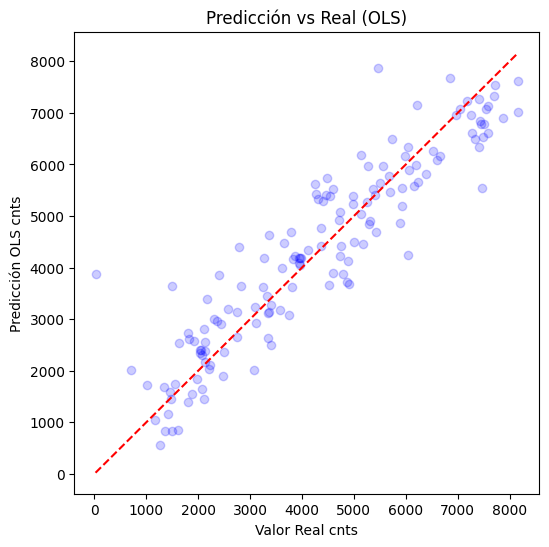

In [173]:
import matplotlib.pyplot as plt


plt.figure(figsize=(6,6))
plt.scatter(y_bk_test, y_bk_pred, color='blue', alpha=0.2)
plt.xlabel("Valor Real cnts")
plt.ylabel("Predicción OLS cnts")
plt.title("Predicción vs Real (OLS)")

# línea identidad
lims = [min(y_bk_test.min(), y_bk_pred.min()),
        max(y_bk_test.max(), y_bk_pred.max())]
plt.plot(lims, lims, 'r--')  
plt.show()

### 3. Implement Gradient Descent

- Implement gradient descent to minimize mean squared error.

- Experiment with at least two learning rates; show cost vs. iteration curves.

In [ ]:
### StepSize 0.05
step_size_1 = 0.05
gd_1=gradient_descent(step_size_1,X_bk_train_std,y_bk_train)
gd_1.fit()

Iteracion 0. MSE: 12234109.745719
Iteracion 100. MSE: 357410.926669
Iteracion 200. MSE: 353814.223714
Iteracion 300. MSE: 353110.721273
Iteracion 400. MSE: 352945.107797
Iteracion 500. MSE: 352905.390824
Iteracion 600. MSE: 352895.811214
Iteracion 700. MSE: 352893.496591
Iteracion 800. MSE: 352892.937035
Iteracion 900. MSE: 352892.801741
Iteracion 1000. MSE: 352892.769027
Iteracion 1100. MSE: 352892.761117

Coeficientes:
season         579.461687
yr            1036.707413
mnth          -145.209178
holiday        -54.866531
weekday        141.407337
workingday      95.258905
weathersit    -515.537266
atemp          895.162538
hum             15.226915
windspeed     -104.075491
Intercepto    4560.977740
dtype: float64

Nro. Iteraciones: 1142


In [ ]:
### StepSize 0.6
step_size_2 = 0.6
gd_2=gradient_descent(step_size_2,X_bk_train_std,y_bk_train)
gd_2.fit()

Iteracion 0. MSE: 12234109.745719
Iteracion 100. MSE: 352892.758896

Coeficientes:
season         579.554225
yr            1036.710243
mnth          -145.298465
holiday        -54.861989
weekday        141.409045
workingday      95.259365
weathersit    -515.543939
atemp          895.148578
hum             15.236714
windspeed     -104.073164
Intercepto    4560.977740
dtype: float64

Nro. Iteraciones: 121


In [156]:
### StepSize 0.3
step_size_3 = 0.3
gd_3=gradient_descent(step_size_3,X_bk_train_std,y_bk_train)
gd_3.fit()

Iteracion 0. MSE: 12234109.745719
Iteracion 100. MSE: 352895.372148
Iteracion 200. MSE: 352892.759041

Coeficientes:
season         579.546034
yr            1036.709993
mnth          -145.290562
holiday        -54.862391
weekday        141.408894
workingday      95.259324
weathersit    -515.543352
atemp          895.149813
hum             15.235850
windspeed     -104.073369
Intercepto    4560.977740
dtype: float64

Nro. Iteraciones: 230


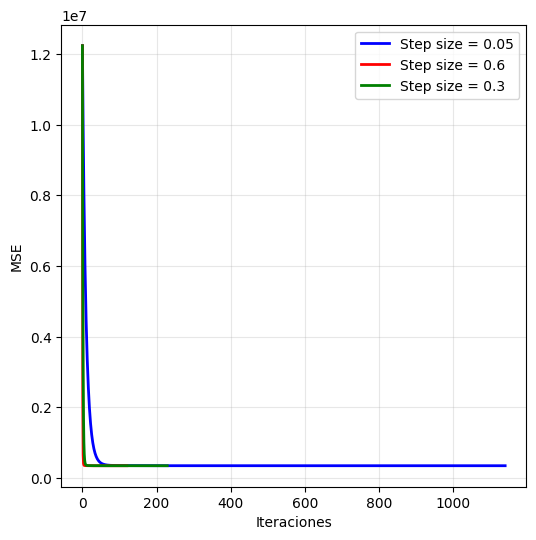

In [157]:
plt.figure(figsize=(6, 6))
plt.plot(range(len(gd_1.costo)), gd_1.costo, 'b-', label=f'Step size = {gd_1.step_size}', linewidth=2)
plt.plot(range(len(gd_2.costo)), gd_2.costo, 'r-', label=f'Step size = {gd_2.step_size}', linewidth=2)
plt.plot(range(len(gd_3.costo)), gd_3.costo, 'g-', label=f'Step size = {gd_3.step_size}', linewidth=2)

plt.xlabel('Iteraciones')
plt.ylabel('MSE')
plt.legend()
plt.grid(True, alpha=0.3)

- Compare parameters and test error to the closed-form OLS.

In [158]:
param_OLS = beta_best_df
param_GD = pd.DataFrame(data=gd_1.coeficientes)

In [ ]:
param_GD.T # parametros gradient descent

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,Intercepto
0,579.461687,1036.707413,-145.209178,-54.866531,141.407337,95.258905,-515.537266,895.162538,15.226915,-104.075491,4560.97774


In [160]:
param_OLS

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,Intercepto
0,579.561443,1036.710463,-145.30543,-54.861635,141.409178,95.2594,-515.544457,895.14749,15.237475,-104.072983,4560.97774


In [161]:
mse_ols = np.mean((y_bk_test - y_bk_pred) ** 2)

y_pred_gd = X_bk_test_std.dot(gd_1.coeficientes)
mse_gd = np.mean((y_bk_test - y_pred_gd) ** 2)

print("MSE OLS - forma cerrada:",mse_ols)
print("MSE GD:",mse_gd)

MSE OLS - forma cerrada: 621667.5111514324
MSE GD: 621665.257898278


### Part B. Scikit-learn Linear Models
#### 4. Baseline

- Use LinearRegression and confirm the coefficients match your OLS implementation.

In [162]:
linear_model = LinearRegression()
linear_model.fit(X_bk_train_std, y_bk_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [163]:
print("Parametros OLS")
param_OLS

Parametros OLS


,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,Intercepto
0,579.561443,1036.710463,-145.30543,-54.861635,141.409178,95.2594,-515.544457,895.14749,15.237475,-104.072983,4560.97774


In [164]:
print("Parametros LinearModel")
pd.DataFrame(data=linear_model.coef_).T

Parametros LinearModel


,0,1,2,3,4,5,6,7,8,9,10
0,579.561443,1036.710463,-145.30543,-54.861635,141.409178,95.2594,-515.544457,895.14749,15.237475,-104.072983,0.0


- Compute R2 and mean squared error on the test set.

In [165]:
test_mse = ((y_bk_test - linear_model.predict(X_bk_test_std)) ** 2).mean()
test_R2 = 1 - test_mse / ((y_bk_test - y_bk_test.mean()) ** 2).mean()

In [166]:
print(f"MSE de Scikit LinearModel : {test_mse: .4f}")
print(f"R2 of basic model: {test_R2: .4f}")

MSE de Scikit LinearModel :  621667.5112
R2 of basic model:  0.8450


### Part C. Regularization and Hyperparameter Choice

#### Ridge and Lasso

- Fit Ridge and Lasso regressions for $\lambda$ values logarithmically spaced between $10^{-3}$ and $10^5$

In [167]:
# creando ridge coeficientes
alphas_ridge = np.logspace(-3, 5, )
ridge_coefs = []
for a in alphas_ridge:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_bk_train_std, y_bk_train)
    ridge_coefs.append(ridge.coef_)


# creando lasso coeficientes
feature_names = X_bk_train_std.columns.tolist()
alphas_lasso = np.logspace(-3, 5, )
lasso_coefs = []
for a in alphas_lasso:
    lasso = Lasso(alpha=a)
    lasso.fit(X_bk_train_std, y_bk_train)
    lasso_coefs.append(lasso.coef_)


- Plot coefficient magnitude vs. λ (regularization paths).

(np.float64(0.00039810717055349735),
 np.float64(251188.6431509582),
 np.float64(-769.3686583566698),
 np.float64(4814.795576903281))

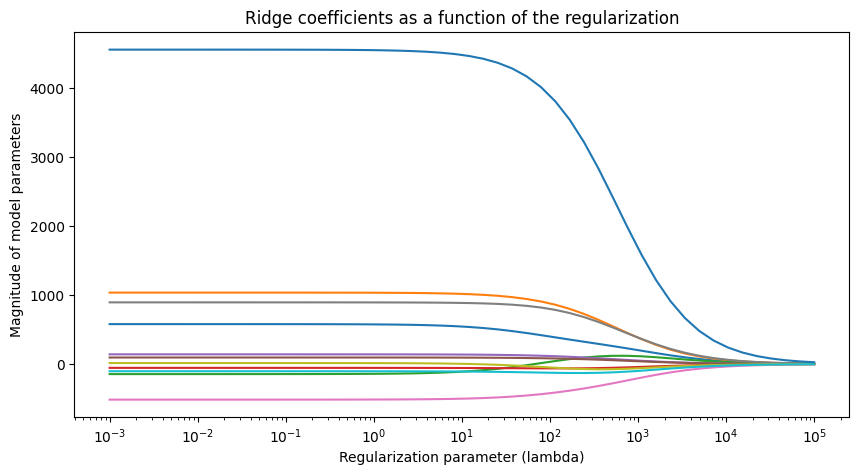

In [168]:
# plot ridge coefficients
plt.figure(figsize=(10, 5))
plt.plot(alphas_ridge, ridge_coefs)
plt.xscale('log')
plt.xlabel('Regularization parameter (lambda)')
plt.ylabel('Magnitude of model parameters')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

(np.float64(0.00039810717055349735),
 np.float64(251188.6431509582),
 np.float64(-593.1538968423512),
 np.float64(1114.3215066529092))

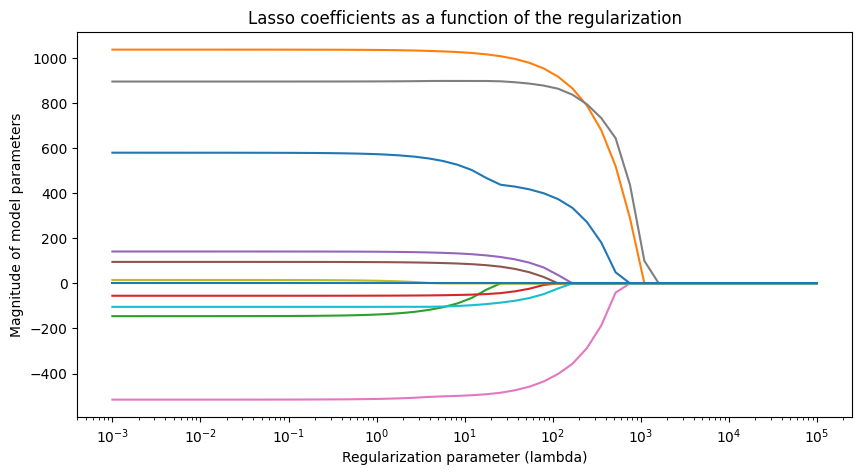

In [169]:
# plot ridge coefficients
plt.figure(figsize=(10, 5))
plt.plot(alphas_lasso, lasso_coefs)
plt.xscale('log')
plt.xlabel('Regularization parameter (lambda)')
plt.ylabel('Magnitude of model parameters')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')


- Comment on which features shrink to (or toward) zero and why.

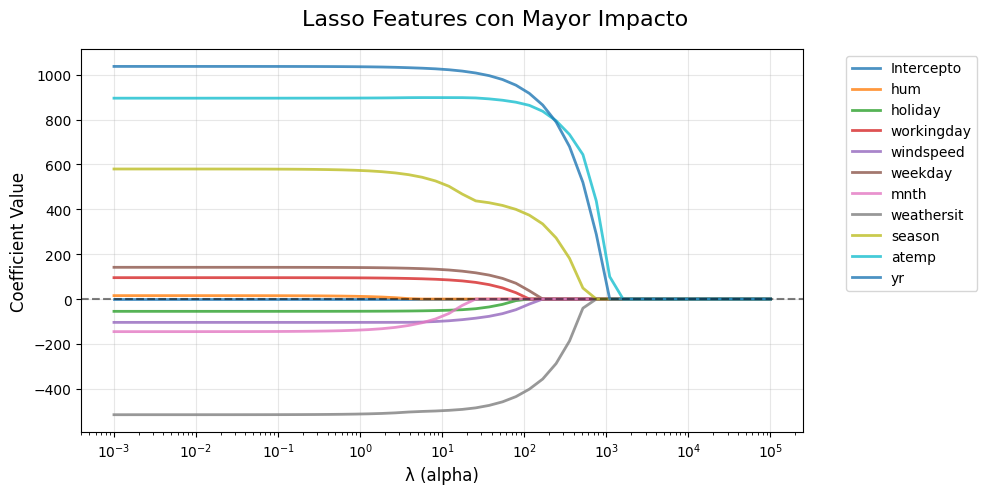

In [ ]:
lasso_coefs = np.array(lasso_coefs)

plt.figure(figsize=(10, 5))
plt.suptitle('Lasso Features con Mayor Impacto', fontsize=16)

initial_coefs = np.abs(lasso_coefs[0])  # lambda más pequeño
important_indices = np.argsort(initial_coefs)

for i in important_indices:
    plt.semilogx(alphas_lasso, lasso_coefs[:, i], 
                linewidth=2, alpha=0.8, label=feature_names[i])

plt.xlabel('λ (alpha)', fontsize=12)
plt.ylabel('Valor de coeficiente', fontsize=12)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Explorando un poco los efectos estacionales, las variables `season`, `weathersit`, `yr`, afectan significativamente al modelo.

#### 6. k-Fold Cross-Validation

- Use `KFold` with `5 folds` and `cross_val_score` to select the best $\alpha$ for both Ridge and Lasso.

In [ ]:
# import warnings
# from sklearn.model_selection import KFold
# upper_bound = 1
# niter = 1000
# alpha = np.arange(0,upper_bound,upper_bound/niter)
# kf = KFold(n_splits=5)

# avg_mspe = []

# for i in alpha:

#     fold_pe = []

#     X_std = X_train_std.values  # Convertir a numpy array
#     y_vals = y_train.values if hasattr(y_train, 'values') else y_train

#     for train_index, test_index in kf.split(X_std):

#         X_train_fold, X_test_fold = X_std[train_index], X_std[test_index]
#         y_train_fold, y_test_fold = y_vals[train_index], y_vals[test_index]

#         with warnings.catch_warnings():
#             warnings.simplefilter("ignore")
#             model = Lasso(alpha=i).fit(X_train_fold,y_train_fold)

#         predict = model.predict(X_test_fold)

#         pe = np.sum((y_test_fold-predict)**2)

#         fold_pe.append(pe)

#     avg_mspe.append(np.mean(np.array(fold_pe)))

# chosen_alpha = alpha[np.argmin(avg_mspe)]

In [ ]:
#chosen_alpha

In [174]:
from sklearn.model_selection import KFold, cross_val_score
# configuración
kf = KFold(n_splits=5, shuffle=True, random_state=42)
niter = 1000
alpha = np.logspace(-3, 2, 100)

# --- Ridge ---
ridge_avg_mspe = []
for i in alpha:
    ridge = Ridge(alpha=i)
    # cross_val_score devuelve por defecto R²; pedimos MSE negativo
    scores = cross_val_score(ridge, X_bk_train_std, y_bk_train, cv=kf, scoring='neg_mean_squared_error')
    ridge_avg_mspe.append(-scores.mean())  # promedio de los 5 folds

best_alpha_ridge = alpha[np.argmin(ridge_avg_mspe)]
print("Mejor α para Ridge:", best_alpha_ridge)

# --- Lasso ---
lasso_avg_mspe = []
for i in alpha:
    lasso = Lasso(alpha=i, max_iter=5000)
    scores = cross_val_score(lasso, X_bk_train_std, y_bk_train, cv=kf, scoring='neg_mean_squared_error')
    lasso_avg_mspe.append(-scores.mean())

best_alpha_lasso = alpha[np.argmin(lasso_avg_mspe)]
print("Mejor α para Lasso:", best_alpha_lasso)

Mejor α para Ridge: 4.862601580065354
Mejor α para Lasso: 19.630406500402724


- Alternatively, demonstrate the convenience of RidgeCV and LassoCV.

In [175]:
from sklearn.linear_model import RidgeCV, LassoCV

ridgecv = RidgeCV(alphas=alpha, cv=kf, scoring='neg_mean_squared_error')
lassocv = LassoCV(alphas=alpha, cv=kf, max_iter=5000)

ridgecv.fit(X_bk_train_std, y_bk_train)
lassocv.fit(X_bk_train_std, y_bk_train)

print("RidgeCV mejor α:", ridgecv.alpha_)
print("LassoCV mejor α:", lassocv.alpha_)


RidgeCV mejor α: 4.862601580065354
LassoCV mejor α: 19.630406500402724


- Compare cross-validated test errors.

In [176]:
print("Mejor α Ridge:", best_alpha_ridge,
      "\n\tMSE validación cruzada:", min(ridge_avg_mspe))

print("Mejor α Lasso:", best_alpha_lasso,
      "\n\tMSE validación cruzada:", min(lasso_avg_mspe))

Mejor α Ridge: 4.862601580065354 
	MSE validación cruzada: 761266.5249661535
Mejor α Lasso: 19.630406500402724 
	MSE validación cruzada: 760337.2081471116


### 7. Feature Engineering & Multicollinearity
- Add polynomial features (degree 2) using PolynomialFeatures.

In [177]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# pipeline sin regularización
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("pf", polynomial_features), ("lr", linear_regression)])
pipeline.fit(X_bk_train_std, y_bk_train)

# pipeline Ridge
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
ridge = Ridge(alpha=best_alpha_ridge) 
pipeline_ridge = Pipeline([("pf", polynomial_features), ("rd", ridge)])
pipeline_ridge.fit(X_bk_train_std, y_bk_train)

# pipeline Lasso
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
lasso = Lasso(alpha=best_alpha_lasso, max_iter=5000) 
pipeline_lasso = Pipeline([("pf", polynomial_features), ("ls", lasso)])
pipeline_lasso.fit(X_bk_train_std, y_bk_train)

,steps,"[('pf', ...), ('ls', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,2
,interaction_only,False
,include_bias,False
,order,'C'
,alpha,np.float64(19.630406500402724)
,fit_intercept,True
,precompute,False


In [178]:
from sklearn.model_selection import cross_val_score
import numpy as np

for name, model in [("OLS", pipeline),
                    ("Ridge", pipeline_ridge),
                    ("Lasso", pipeline_lasso)]:
    scores = cross_val_score(model, X_bk_train_std, y_bk_train,
                             cv=5, scoring='neg_mean_squared_error')
    print(f"{name} CV MSE: {-scores.mean():.4f}")


OLS CV MSE: 599801.0748
Ridge CV MSE: 544913.1995
Lasso CV MSE: 497162.1347


Para OLS, al agregar términos polinómicos, el número de features crece mucho. El modelo tiene más grados de libertad por lo que se ajusta mejor a los datos de entrenamiento, tendiendo a sobreajustar y el error de validación/test sube.

Ridge y Lasso suelen tener errores de validación más bajos porque controlan el sobreajuste.

Lasso puede dejar muchos términos del polinomio fuera ya que convierte a los coeficientes a 0, simplificando el modelo